# **End-to-End Machine Learning Pipeline Project**
# “Predicting Loan Default Risk”
# **Objective**

Build a complete ML pipeline from raw data to final evaluation, exactly how it’s done in real companies.

You will demonstrate:

- Exploratory Data Analysis (EDA)

- Feature engineering

- Model selection

- Error analysis

- Final report & conclusions

# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


# Exploratory Data Analysis

In [2]:
df = pd.read_csv("Loan_default.csv")

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


**Target Distribution**

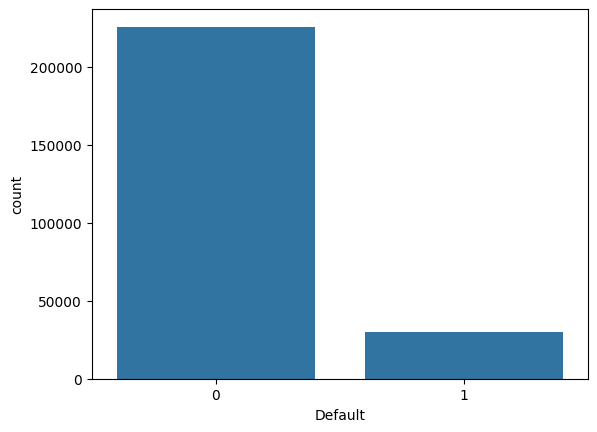

In [3]:
sns.countplot(x='Default', data=df)
plt.show()

# Data Cleaning & Feature Engineering

In [4]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [7]:
# Drop 'LoanID' as it's an identifier and not a feature for modeling.
df_no_loanid = df.drop('LoanID', axis=1)

# Apply one-hot encoding to convert categorical features into numerical format.
df_encoded = pd.get_dummies(df_no_loanid, drop_first=True)

# Separate features (X) and target (y) from the processed DataFrame.
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train / Validation / Test Split

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Model Selection
Train multiple models:

In [9]:
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Evaluation Metrics

In [12]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, preds)
    print(name, "ROC-AUC:", auc)

Logistic ROC-AUC: 0.7486823510117292
Random Forest ROC-AUC: 0.7378436479563322
XGBoost ROC-AUC: 0.7404377426309675


Select best model (usually XGBoost)

# Error Analysis

In [13]:
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33522   333]
 [ 4065   383]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     33855
           1       0.53      0.09      0.15      4448

    accuracy                           0.89     38303
   macro avg       0.71      0.54      0.54     38303
weighted avg       0.85      0.89      0.85     38303



# Final Model Evaluation

In [14]:
final_auc = roc_auc_score(
    y_test, best_model.predict_proba(X_test)[:,1]
)
print("Final ROC-AUC:", final_auc)

Final ROC-AUC: 0.7438062731029177


# Final Report
**Key Findings**

- Data imbalance required ROC-AUC

- Feature scaling improved convergence

- XGBoost performed best due to regularization

**Business Impact**

Reduces financial losses by identifying high-risk loan applicants early.